In [16]:
!pip install kaggle

### Skip directory creation if it already exists

In [17]:
import os
if not os.path.exists(os.path.expanduser('~/.kaggle')):
    os.makedirs(os.path.expanduser('~/.kaggle'))

### insert your kaggle.json file which contains the API

In [18]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kolangath","key":"b623bebe39f498d756fa87b4c38d1d93"}'}

### creating and placing API in directory directory

In [19]:
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Parsing the data

In [20]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection
!unzip brain-mri-images-for-brain-tumor-detection.zip -d brain_tumor_dataset

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  brain-mri-images-for-brain-tumor-detection.zip
replace brain_tumor_dataset/brain_tumor_dataset/no/1 no.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace brain_tumor_dataset/brain_tumor_dataset/no/10 no.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: brain_tumor_dataset/brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/brain_tumor_dataset/no/17 no.jpg  
  infl

## Import necessary libraries

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

### Set up directories for the training and validation datasets

In [22]:
train_dir = 'brain_tumor_dataset/'

### Data Preprocessing

In [23]:
img_width, img_height = 128, 128  # Resize all images to 128x128

train_datagen = ImageDataGenerator(
    rescale=1.0/255,              # Normalize pixel values
    validation_split=0.2          # Split off 20% of data for validation
)

### Data Generators

In [24]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    subset='training'              # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    subset='validation'            # Set as validation data
)

Found 406 images belonging to 3 classes.
Found 100 images belonging to 3 classes.


### Model Architecture

In [25]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the Model

In [26]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Training the Model

In [27]:
epochs = 10  # Set to more epochs if necessary
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.2632 - loss: 0.7517 - val_accuracy: 0.2083 - val_loss: 0.5803
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1364 - loss: 0.7105 - val_accuracy: 0.2500 - val_loss: 0.4093
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.1718 - loss: 0.5918 - val_accuracy: 0.1875 - val_loss: 0.2933
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1250 - loss: 0.5125 - val_accuracy: 0.2500 - val_loss: 0.4652
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.1835 - loss: 0.4843 - val_accuracy: 0.1979 - val_loss: 0.2677
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1250 - loss: 0.6214 - val_accuracy: 0.0000e+00 - val_loss: -0.3602
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.1767 - loss: 0.5000 - val_accuracy: 0.1875 - val_loss: 0.3510
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3438 - loss: 0.3962 - val_accuracy: 0.2500 - val_loss: -0.3195
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.2026 - loss: 0.6800 - val_accuracy: 0.1979 - val_loss: 0.4459
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3750 - loss: 0.5477 - val_accuracy: 0.0000e+00 - val_los

### Evaluate the Model

In [28]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.1947 - loss: 0.4302
Validation Loss: 0.45538783073425293
Validation Accuracy: 0.1899999976158142


### Save the model

In [29]:
model.save("brain_tumor_classification_model.h5")

### Plot training & validation accuracy and loss

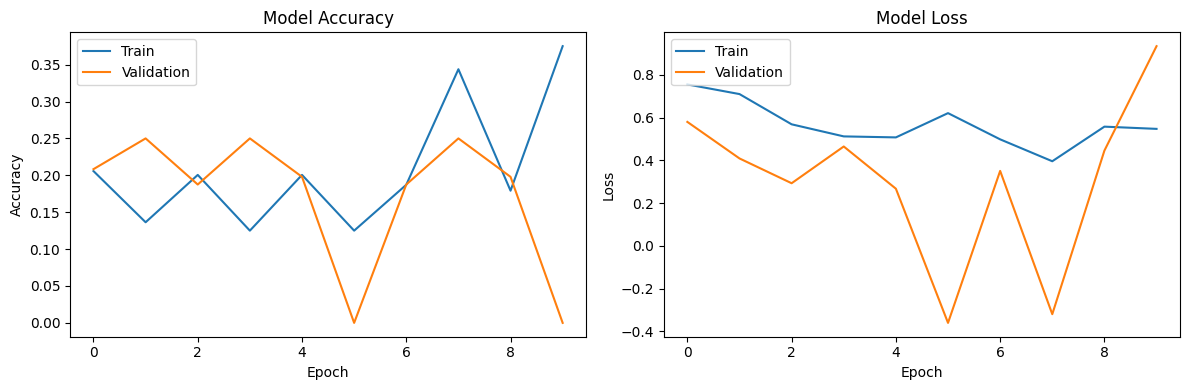

In [31]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Function to visualize predictions

In [32]:
def visualize_predictions(generator, model, num_images=5):
    x_val, y_val = next(generator)

    plt.figure(figsize=(15, 15))

    for i in range(num_images):
        img = x_val[i]
        true_label = y_val[i]
        prediction = model.predict(np.expand_dims(img, axis=0))[0][0]

        predicted_label = 'Tumor' if prediction > 0.5 else 'No Tumor'
        true_label_text = 'Tumor' if true_label == 1 else 'No Tumor'

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'True: {true_label_text}\nPred: {predicted_label}')

    plt.show()

### Visualize predictions on 5 random images from the validation set

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


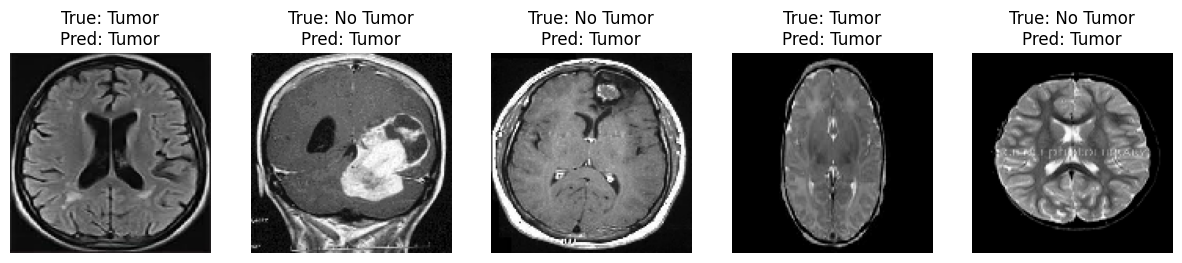

In [33]:
visualize_predictions(validation_generator, model, num_images=5)